### Libraries

In [4]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import math
from matplotlib.ticker import MaxNLocator
from matplotlib.patches import Rectangle

## Constants

In [123]:
# Maximum time
time_max = 10000
# Number of trajectories at the start
nb_start = 10
# Starting point location
start_point = 1
# Region of interest
top_level = 100

# Levels
level1 = 5
level2 = 20
level3 = 60

## Simple one-dimensional brownian motion

In [66]:
traject = np.zeros((nb_start, time_max))

for tra in range(nb_start):
#     1 is t - s which we always take to be one second
    increment = np.random.normal(0,1,time_max)
    traject[tra, 0:time_max] = np.cumsum(increment)

for tra in range(nb_start):
    plt.plot(range(time_max), traject[tra, 0:time_max])

In [129]:
# Empty lists for results
d = {'value': [], 'time': [], "index":[]}
df = pd.DataFrame(data=d)
prop_list = []

### Level 1 simulation

In [130]:
for tra in range(nb_start):
    time = [0]
    value = [start_point]
    greater_than0 = True
    tm = 1
    while greater_than0 and tm < time_max:
        increment = np.random.normal(0,1,1)
        time.append(tm)
        value.append(value[tm-1]+increment[0])
        if value[tm] < 0 or value[tm] > level1:
#             Kill if reaches 0
            greater_than0 = False
        tm += 1
    new_data = {"value":value, "time": time, "index":np.repeat(tra, tm)}
    df_new = pd.DataFrame(data=new_data)
    df = pd.concat([df, df_new], ignore_index=True)

Text(0.5, 0, 'Time')

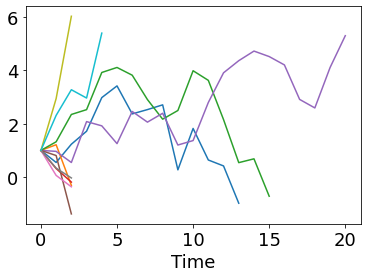

In [131]:
# Plot only the starting one
matplotlib.rcParams.update({'font.size': 18})
for tra in range(nb_start):
    sbst = df[df["index"] == tra]
    plt.plot(sbst["time"], sbst["value"])

plt.xlabel("Time")
# plt.savefig('first10.pdf', bbox_inches='tight')

In [132]:
def sim_level(level_number, next_level, result, prop):
#     first_level = level_number
# Which ones have reaches the first level
    sbst = result[result["value"] > level_number]
    trajectories_level = np.random.permutation(pd.unique(sbst["index"]))
    prop.append(len(trajectories_level)/nb_start)
    # For indexing new particles, starts after last starting particle
    last_index = np.unique(result["index"])[-1] + 1
#     Somehow by doing the ceiling here, you might end up with many more particles
    new_particles = math.floor(nb_start/len(trajectories_level))
    extra_ones = nb_start % len(trajectories_level)
    extra_index = 1
    # For each parent
    for start_point in trajectories_level:
#         assignment of the remainder particles
        if extra_index <= extra_ones:
            actual_new = new_particles + 1
        else:
            actual_new = new_particles
        extra_index += 1
        # For each child
        for tra in range(actual_new):
            starting_point = sbst[sbst["index"] == start_point].iloc[0]
            time = [starting_point["time"]]
            value = [starting_point["value"]]
            greater_than0 = True
            tm = int(time[0] + 1)
            while greater_than0 and tm < time_max:
                increment = np.random.normal(0,1,1)
                time.append(tm)
                value.append(value[int(tm-1-time[0])]+increment[0])
                if value[int(tm-time[0])] < 0 or value[int(tm-time[0])] > next_level:
        #             Kill if ever reaches 0
                    greater_than0 = False
                tm += 1
            new_data = {"value":value, "time": time, "index":np.repeat(last_index, int(tm - time[0]))}
            df_new = pd.DataFrame(data=new_data)
            result = pd.concat([result, df_new], ignore_index=True)
            last_index += 1
    return result, prop

In [133]:
df, prop_list = sim_level(level1, level2, df, prop_list)

In [134]:
df, prop_list = sim_level(level2, level3, df, prop_list)

In [135]:
df, prop_list = sim_level(level3, top_level, df, prop_list)

### Plot all simulated

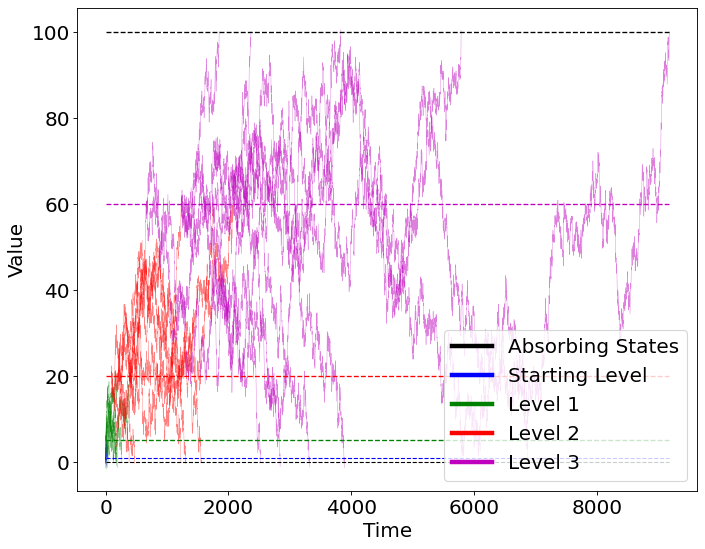

In [139]:
cols = ["b", "g", "r", "m"]
legend_lbl = ["Starting Level", "Level 1", "Level 2", "Level 3"]

plt.figure(figsize=(10, 8), dpi=80)
plt.plot(0,0, c="k", alpha = 0.01, label = "Absorbing States")
for tra in range(len(pd.unique(df["index"]))):
    sbst = df[df["index"] == tra]
    if tra % 10 == 0:
        plt.plot(sbst["time"], sbst["value"], cols[math.floor(tra/10)], linewidth=0.4, alpha = 0.5,
                 label = legend_lbl[math.floor(tra/10)])
    else:
        plt.plot(sbst["time"], sbst["value"], cols[math.floor(tra/10)], linewidth=0.4, alpha = 0.5)

leg = plt.legend(loc="lower right")
for lh in leg.legendHandles: 
    lh.set_alpha(1)
for line in leg.get_lines():
    line.set_linewidth(4.0)
plt.plot([0, max(df["time"])], [start_point, start_point], "--b", linewidth=1)
plt.plot([0, max(df["time"])], [level1, level1], "--g", linewidth=1.2)
plt.plot([0, max(df["time"])], [level2, level2], "--r", linewidth=1.2)
plt.plot([0, max(df["time"])], [level3, level3], "--m", linewidth=1.2)
plt.plot([0, max(df["time"])], [top_level, top_level], "--k", linewidth=1.2)
plt.plot([0, max(df["time"])], [0, 0], "--k", linewidth=1)
plt.xlabel("Time")
plt.ylabel("Value")
# plt.savefig('brown1.pdf', bbox_inches='tight')

Proportion that reached each level.

In [137]:
prop_list

[0.3, 0.4, 0.4]

Estimate of the probability

In [141]:
np.prod(prop_list)*len(df[df["value"]>100])/nb_start

0.024

Proportion that reached the final level.

In [140]:
len(df[df["value"]>100])/nb_start

0.5

## Simulate two dimensions 

In [75]:
initial_point = 2

bottom_level = 1
top_level = 100
max_time = 1000000
nb_start = 10
step_size = 1
first_level = 5
second_level = 25
# third_level = 30
# fourth_level = 75

In [76]:
d = {'x': [], "y":[], 'time': [], "index":[]}
df = pd.DataFrame(data=d)
prop_2d = []

First level.

In [77]:
for tra in range(nb_start):
    time = [0]
    angle = np.random.uniform(low=0, high=2*math.pi, size=1)
    value = np.array(([initial_point*math.cos(angle), initial_point*math.sin(angle)]))
    not_at_boundry = True
    tm = 1
    while not_at_boundry and tm < max_time:
        increment = np.random.normal(0,step_size,2)
        time.append(tm)
        new_position = value[tm-1]+increment
        value = np.vstack((value, new_position))
#         check radius
        r = math.sqrt(value[tm][0]**2+value[tm][1]**2)
        if r < bottom_level or r > first_level:
#             Kill if reaches 0
            not_at_boundry = False
        tm += 1
    new_data = {"x":value[:,0],"y":value[:,1], "time": time, "index":np.repeat(tra, tm)}
    df_new = pd.DataFrame(data=new_data)
    df = pd.concat([df, df_new], ignore_index=True)

All other levels.

In [78]:
def sim_2d(level_number, next_level, result, prop):
#     first_level = level_number
# Which ones have reaches the first level
    result["r"] = np.sqrt(result["x"]**2+result["y"]**2)
    sbst = result[result["r"] > level_number]
    trajectories_level = np.random.permutation(pd.unique(sbst["index"]))
    prop.append(len(trajectories_level)/nb_start)
    # For indexing new particles, starts after last starting particle
    last_index = np.unique(result["index"])[-1] + 1
#     Number of particles to parent
    new_particles = math.floor(nb_start/len(trajectories_level))
#     How many extra ones need to be assigned
    extra_ones = nb_start % len(trajectories_level)
    extra_index = 1
    # For each parent
    for start_point in trajectories_level:
#         assignment of the remainder particles
        if extra_index <= extra_ones:
            actual_new = new_particles + 1
        else:
            actual_new = new_particles
        extra_index += 1
        starting_point = sbst[sbst["index"] == start_point].iloc[0]
        # For each child
        for tra in range(actual_new):

            time = [starting_point["time"]]
            value = np.array(([starting_point["x"], starting_point["y"]]), ndmin=2)
#             if reached either stopping time
            not_at_boundry = True
            tm = int(time[0] + 1)
            while not_at_boundry and tm < max_time:
#                 Next step
                increment = np.random.normal(0,step_size,2)
                time.append(tm)
#                 Add next step
                new_position = value[int(tm-time[0]-1)]+increment
                value = np.vstack((value, new_position))
#         distance from origin
                r = math.sqrt(value[int(tm-time[0])][0]**2+value[int(tm-time[0])][1]**2)
                if r < bottom_level or r > next_level:
        #             Kill if ever reaches 0
                    not_at_boundry = False
                tm += 1
            new_data = {"x":value[:,0],"y":value[:,1], "time": time, "index":np.repeat(last_index, int(tm - time[0]))}
            df_new = pd.DataFrame(data=new_data)
            result = pd.concat([result, df_new], ignore_index=True)
            print("the parent of", int(last_index), "is", int(start_point))
            last_index += 1
    return result, prop

In [79]:
df, prop_2d = sim_2d(first_level, second_level, df, prop_2d)

the parent of 10 is 9
the parent of 11 is 9
the parent of 12 is 9
the parent of 13 is 4
the parent of 14 is 4
the parent of 15 is 4
the parent of 16 is 7
the parent of 17 is 7
the parent of 18 is 0
the parent of 19 is 0


In [80]:
df, prop_2d = sim_2d(second_level, top_level, df, prop_2d)

the parent of 20 is 11
the parent of 21 is 11
the parent of 22 is 18
the parent of 23 is 18
the parent of 24 is 17
the parent of 25 is 17
the parent of 26 is 13
the parent of 27 is 13
the parent of 28 is 15
the parent of 29 is 15


In [81]:
# df, prop_2d = sim_2d(third_level, top_level, df, prop_2d)

In [50]:
# df, prop_2d = sim_2d(fourth_level, top_level, df, prop_2d)

In [82]:
df["r"] = np.sqrt(df["x"]**2+df["y"]**2)
df[df["r"] > top_level]

,x,y,time,index,r
3681,99.797093,-7.966796,1664.0,21.0,100.114582
5375,11.010736,-99.505904,1738.0,22.0,100.113242
15316,-100.822682,0.223928,2867.0,24.0,100.822931
16951,-79.978191,-61.651622,1817.0,25.0,100.982342
21198,-7.322719,-100.773154,4210.0,27.0,101.038858
26556,-48.023606,87.778001,5627.0,28.0,100.056206
29710,-89.312546,-45.497594,3423.0,29.0,100.233537


In [94]:
# df.to_csv('accurate_df.csv')
# df = pd.read_csv('best_df.csv')

In [117]:
matplotlib.rcParams.update({'font.size': 20})

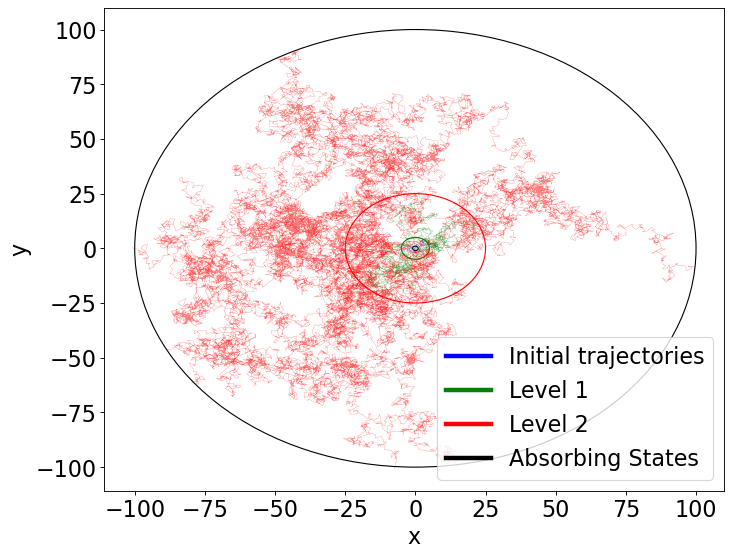

In [120]:
plt.figure(figsize=(10, 8), dpi=80)
cols = ["b", "g", "r", "m"]
labels = ["Initial trajectories", "Level 1", "Level 2", "Level 3"]
for tra in range(len(pd.unique(df["index"]))):
    sbst = df[df["index"] == tra]
    if tra % nb_start == 0:
        plt.plot(sbst["x"], sbst["y"], cols[math.floor(tra/10)],linewidth=0.3, alpha = 0.5, label=labels[math.floor(tra/nb_start)])
    else:
        plt.plot(sbst["x"], sbst["y"], cols[math.floor(tra/10)],linewidth=0.3, alpha = 0.5)
plt.plot(0, 0, alpha=0, c="k", label="Absorbing States")
plt.xlabel("x")
plt.ylabel("y")
leg = plt.legend()
for lh in leg.legendHandles: 
    lh.set_alpha(1)
for line in leg.get_lines():
    line.set_linewidth(4.0)
cir0 = plt.Circle((0, 0), bottom_level, color='k', fill=False)
plt.gca().add_patch(cir0)
cir1 = plt.Circle((0, 0), first_level, color='g', fill=False)
plt.gca().add_patch(cir1)
cir2 = plt.Circle((0, 0), second_level, color='r', fill=False)
plt.gca().add_patch(cir2)
# cir3 = plt.Circle((0, 0), third_level, color='m', fill=False)
# plt.gca().add_patch(cir3)
cir = plt.Circle((0, 0), top_level, color='k', fill=False)
plt.gca().add_patch(cir)
plt.savefig('dim2.pdf', bbox_inches='tight')

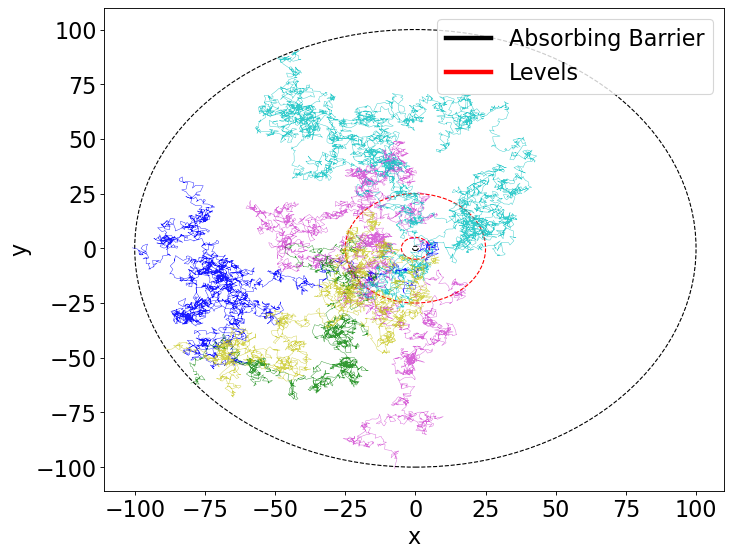

In [122]:
plt.figure(figsize=(10, 8), dpi=80)
ind = [4,7,13,15,17,24,25,27,28,29]
for tra in ind:
    sbst = df[df["index"] == tra]
#     if tra in [9,11,21]:
#         plt.plot(sbst["x"], sbst["y"], "b", linewidth=0.4, alpha = 0.5)
#     elif tra in [0,18,22]:
#         plt.plot(sbst["x"], sbst["y"], "y", linewidth=0.4, alpha = 0.9)
    if tra in [7,17,24]:
        plt.plot(sbst["x"], sbst["y"], "b", linewidth=0.4, alpha = 0.9)
    elif tra == 25:
        plt.plot(sbst["x"], sbst["y"], "g", linewidth=0.4, alpha = 0.8)
    elif tra in [4,13,27]:
        plt.plot(sbst["x"], sbst["y"], "m", linewidth=0.4, alpha = 0.6)
    elif tra in [28,15]:
        plt.plot(sbst["x"], sbst["y"], "c", linewidth=0.4, alpha = 0.8)
#     29 label
    else:
        plt.plot(sbst["x"], sbst["y"], "y", linewidth=0.4, alpha = 0.7)
plt.xlabel("x")
plt.ylabel("y")
cir0 = plt.Circle((0, 0), bottom_level, color='k',linestyle="--", fill=False)
plt.gca().add_patch(cir0)
cir1 = plt.Circle((0, 0), first_level, color='r', linestyle="--",fill=False)
plt.gca().add_patch(cir1)
cir2 = plt.Circle((0, 0), second_level, color='r', linestyle="--",fill=False)
plt.gca().add_patch(cir2)
# cir3 = plt.Circle((0, 0), third_level, color='r', fill=False)
# plt.gca().add_patch(cir3)
cir = plt.Circle((0, 0), top_level, color='k', linestyle="--",fill=False)
plt.gca().add_patch(cir)

plt.plot(0, 0, alpha=0, c="k",label="Absorbing Barrier")
plt.plot(0, 0, alpha=0, c="r",label="Levels")
leg = plt.legend()
for lh in leg.legendHandles: 
    lh.set_alpha(1)
for line in leg.get_lines():
    line.set_linewidth(4.0)
# plt.savefig('merge.pdf', bbox_inches='tight')

Estimate of the probability.

In [85]:
np.prod(prop_2d)*len(df[df["r"] > top_level])/nb_start

0.14

Proportion that reached the final level.

In [87]:
len(df[df["r"] > top_level])/nb_start

0.7

Full list of successful trajectory proportions.

In [86]:
prop_2d

[0.4, 0.5]